**Загрузка библиотек**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

**Чтение данных**

In [3]:
def read_excel():
    d = []
    book = load_workbook("isx.xlsx")
    sheet = book.active
    for i in range(1, 101):
        result = []
        for j in range(1, 101):
            value = sheet.cell(row=i, column=j).value
            result.append(value)
        d.append(result)
    return d

A = read_excel()

**Выделение точек**

In [4]:
def quant(A, a, b):
    X = [[],[]]
    for i in range(0, 100):
        for j in range(0, 100):
            if a <= A[i][j] and A[i][j] <= b:
                X[0].append(i)
                X[1].append(j)
    return X

In [5]:
X1 = quant(A, 0, 50)
X2 = quant(A, 50, 200)

**Построение графика**

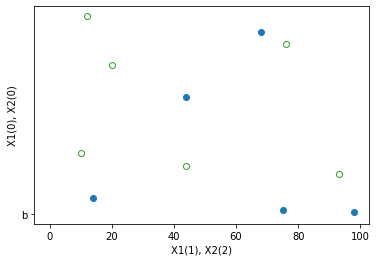

In [6]:
plt.plot(X1[0], X1[1], 'o', 'b')
plt.plot(X2[0], X2[1], 'o', 'b', mfc='none')
plt.xlabel('X1(1), X2(2)')
plt.ylabel('X1(0), X2(0)')
plt.show()

**Определение множества прецедентов**

In [7]:
def prec(A, b):
    X = [[], [], []]
    for i in range(0, 100):
        for j in range(0, 100):
            if A[i][j] != 255:
                if A[i][j] <= b:
                    X[0].append(i), X[1].append(j), X[2].append(1)
                elif A[i][j] > b:
                    X[0].append(i), X[1].append(j), X[2].append(-1)
                continue
    return X

In [8]:
X = prec(A, 40)
print('Множество прецедентов', X)

Множество прецедентов [[10, 12, 14, 20, 44, 44, 68, 75, 76, 93, 98], [30, 98, 8, 74, 24, 58, 90, 2, 84, 20, 1], [-1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1]]


**Вычисление дискриминантной функции методом потенциальных функций**

Задание метрики и потенциальной функции

In [9]:
def u(x, y):
    result2 = 1 / (1 + (x[0] - y[0])**2 + (x[1] - y[1])**2)
    return result2

Вычисление дискриминантной функции

In [10]:
def potential(X):
    a = []
    p = 0
    for j in range(0, len(X[0])):
        a.append(0)
    while p < len(X[0]):
        p = 0
        for k in range(-1, len(X[0])-1):
            r = 0
            for j in range(0, len(X[0])):
                r += a[j]*u((X[0][k+1], X[1][k+1]), (X[0][j], X[1][j]))
            if (X[2][k+1] * r) <= 0:
                a[k+1] += 1*X[2][k+1]
                p += 1
            else:
                p += 1
    return a

In [11]:
a = potential(X)
print('Вектор коэффициентов решающей функции', a)

Вектор коэффициентов решающей функции [-1, 0, 1, 0, -1, 1, -1, 1, 0, -1, 1]


Расчёт рещающей функции

In [12]:
def D(y):
    result = 0
    for j in range(0, len(X[0])):
        result += a[j] * u(y, (X[0][j], X[1][j]))
    return result

**Визуализация решения**

In [13]:
def D_result(NUM):
    N = []
    p = 0
    for i in range(0, len(NUM)):
        G = []
        for j in range(0, len(NUM)):
            if D((i, j)) >= 0:
                p+=1
                G.append(D((i, j)))
            else:
                p+=1
                G.append(0)
        N.append(G)
    return np.asarray(N, dtype=np.float32)

result_X = D_result(A)

In [14]:
def B_result(N):
    result = []
    for i in range(0, len(N)):
        T = []
        for j in range(0, len(N)):
            sum = 0
            for s in range(0, len(X[0])):
                sum += ((X[0][s] - i)**2 + (X[1][s] - j)**2)
            if sum <= 3:
                T.append(0.000001)
                print(sum)
            else:
                T.append(0)
        result.append(T)
    return np.asarray(result, dtype=np.float32)

result_Y = B_result(A)

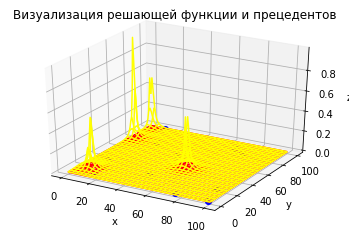

In [15]:
v = np.linspace(0, 100, 100)
x, y = np.meshgrid(v, v)
fig = plt.figure()
ax_3D = fig.add_subplot(projection='3d')
ax_3D.plot(X1[0], X1[1], 'o', color='blue')
ax_3D.plot(X2[0], X2[1], 'o', color='blue')
ax_3D.plot_wireframe(x, y, result_Y, rstride = 3, cstride = 3, color='red')
ax_3D.plot_wireframe(x, y, result_X, rstride = 3, cstride = 3,color='yellow')
ax_3D.set_xlabel('x')
ax_3D.set_ylabel('y')
ax_3D.set_zlabel('z')
ax_3D.set_title('Визуализация решающей функции и прецедентов')
plt.show()